# Fit of `B0_M` with the real data
- no cut on `BDT` for now
- cut on $\Delta M$ : $143\ MeV < \Delta M < 148\ MeV$
- We will fit the part: $5050\ MeV< B0\_M < 5550\ MeV$

## Libraries

In [1]:
import zfit
import json

from bd2dst3pi.locations import loc
from bd2dst3pi.definitions import years, magnets

import sys
sys.path.append(loc.SCRIPTS)
import functions as fct
from fit import launch_fit, save_params, plot_hist_fit, plot_hist_fit_particle

Welcome to JupyROOT 6.22/02


## Load files

In [2]:
with open(f'{loc.JSON}/MC_params.json', 'r') as f:
    MC_param_results = json.load(f)

In [3]:
df_data_strip = fct.load_data(years, magnets, type_data='data_strip', vars=['B0_M','tau_M', 'BDT'],
                            cut_DeltaM=True)

/eos/lhcb/wg/semileptonic/RXcHad/B02Dsttaunu/Run2/ntuples//stripped/data/data_90000000_2015_up.root
/eos/lhcb/wg/semileptonic/RXcHad/B02Dsttaunu/Run2/ntuples//stripped/data/data_90000000_2015_down.root
/eos/lhcb/wg/semileptonic/RXcHad/B02Dsttaunu/Run2/ntuples//stripped/data/data_90000000_2016_up.root
/eos/lhcb/wg/semileptonic/RXcHad/B02Dsttaunu/Run2/ntuples//stripped/data/data_90000000_2016_down.root


In [4]:
df_data_strip_cut = df_data_strip.query("BDT > -0.2")

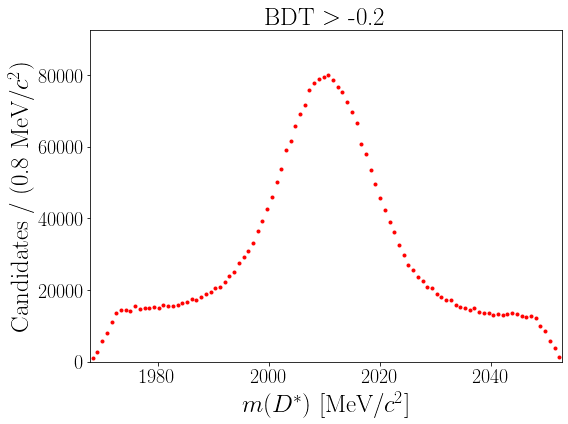

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/data_strip/Dst_M_data_strip_BDT-0.2.pdf


In [5]:
# fct.plot_hist({'data_strip':df_data_strip},'D0_M', 'D0\_M', '', n_bins = 100, mode_hist = False, 
#               name_folder = 'data_strip_BDT')
fct.plot_hist_particle({'data_strip':df_data_strip},'Dst_M', n_bins = 100, mode_hist = False,cut_BDT=-0.2)

## Fitting on $m(3\pi)$  with BDT > -0.2

### $m(\pi\pi\pi)$ distribution

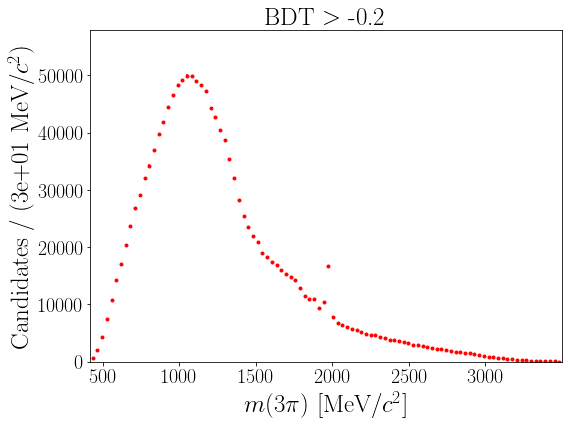

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/data_strip/tau_M_data_strip_BDT-0.2.pdf


In [5]:
# fct.plot_hist({'data_strip_BDTsup-0.2':df_data_strip_cut},'tau_M', 'BDT $>$ -0.2', '', n_bins = 100, mode_hist = False, 
#               name_folder = 'data_strip_BDT')
fct.plot_hist_particle({'data_strip':df_data_strip_cut},'tau_M', n_bins = 100, mode_hist = False, 
              cut_BDT=-0.2)

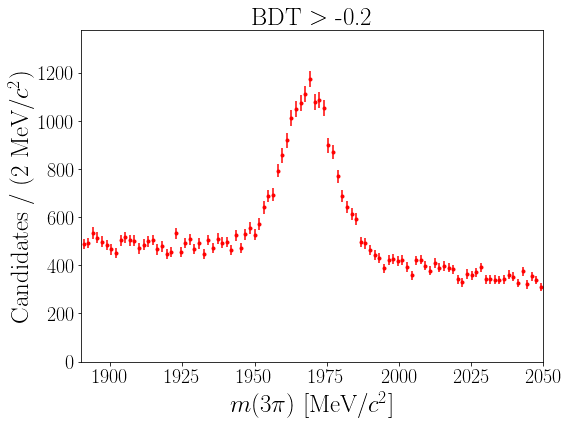

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/data_strip/tau_M_data_strip_BDT-0.2.pdf


In [6]:
# mass of Ds: 1,968 MeV
size_tau_M = 80.
low_tau_M = 1970. - size_tau_M
high_tau_M = 1970. + size_tau_M
# fct.plot_hist({'data_strip_BDTsup-0.2f':df_data_strip_cut},'tau_M', 'tau\_M [BDT $>$ -0.2]', 'MeV/$c^2$', 
#               low = low_tau_M, high = high_tau_M,
#               n_bins = 100, mode_hist = False, 
#               name_folder = 'data_strip_BDT')

fct.plot_hist_particle({'data_strip':df_data_strip_cut},'tau_M',
              low = low_tau_M, high = high_tau_M, cut_BDT=-0.2,
              n_bins = 100, mode_hist = False)

### Gaussian + exp fitting

In [5]:
size_tau_M = 80.
low_tau_M = 1970. - size_tau_M
high_tau_M = 1970. + size_tau_M
obs_tau_M = zfit.Space("x", limits=(low_tau_M, high_tau_M))

In [6]:
n_events_tau_M = len(df_data_strip_cut.query(f'tau_M > {low_tau_M} and tau_M < {high_tau_M}'))
print(n_events_tau_M)

52915


In [7]:
mu_ga = zfit.Parameter("mu_ga", 1970., 1960., 1980.)
sigma_ga = zfit.Parameter("sigma_ga", 10., 1., 30.)

In [8]:
n_bkg_ga = zfit.Parameter('n_bkg_ga', n_events_tau_M/4,0,n_events_tau_M)
n_sig_ga = zfit.Parameter('n_sig_ga', n_events_tau_M*3/4,0,n_events_tau_M)
lambd_ga = zfit.Parameter("lambda_ga", -0.0009, -0.01, -0.0001)

In [9]:
name_params_ga ={
    'mu_ga':'$\mu$',
    'sigma_ga':'$\sigma$',
    'n_bkg_ga':'$n_{bkg}$',
    'n_sig_ga':'$n_{sig}$',
    'lambda_ga':'$\\lambda$',
}

In [10]:
gaussian_ga = zfit.pdf.Gauss(mu_ga,sigma_ga,obs=obs_tau_M)
exponential_ga = zfit.pdf.Exponential(lambd_ga, obs=obs_tau_M)

# sum of the two PDFs
gaussian_ext_ga = gaussian_ga.create_extended(n_sig_ga)
exp_ext_ga = exponential_ga.create_extended(n_bkg_ga)
model_ga = zfit.pdf.SumPDF([gaussian_ext_ga, exp_ext_ga]) # gauss is folded by frac

In [11]:
data_tau_M = zfit.Data.from_pandas(df_data_strip_cut['tau_M'],obs=obs_tau_M)
result_g, params_g = launch_fit(model_ga, data_tau_M, extended=True)

------------------------------------------------------------------
| FCN = -2.574e+05              |     Ncalls=214 (214 total)     |
| EDM = 0.000189 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
name           value    minuit_hesse         minuit_minos    at limit
---------  ---------  --------------  -------------------  ----------
n_sig_ga       10140     +/- 1.8e+02  -1.8e+02   +1.8e+0

In [12]:
# plot_hist_fit(df_data_strip_cut,'tau_M','',MeV/$c^2$',models = [model_ga,gaussian_ext_ga,exp_ext_ga], 
#               obs=obs_tau_M, n_bins = 100,mode_hist = False,
#               name_folder = 'data_strip_cutDeltaM', name_data = 'data\_strip\_BDT\_sup\_-0.2',
#               params=params_g, name_params=name_params_ga)

/afs/cern.ch/user/c/correian/bd2dst3pi/scripts/fit.py:335: UserWarning: The function <function Space.limits at 0x7f48a2e103b0> may does not return the actual area/limits but rather the rectangular limits. <zfit Space obs=('x',), axes=None, limits=(array([[1890.]]), array([[2050.]]))> can also have functional limits that are arbitrarily defined and lay inside the rect_limits. To test if a value is inside, use `inside` or `filter`.
  low = float(obs.limits[0])
/afs/cern.ch/user/c/correian/bd2dst3pi/scripts/fit.py:32: UserWarning: The function <function Space.area at 0x7f48a2e167a0> may does not return the actual area/limits but rather the rectangular limits. <zfit Space obs=('x',), axes=None, limits=(array([[1890.]]), array([[2050.]]))> can also have functional limits that are arbitrarily defined and lay inside the rect_limits. To test if a value is inside, use `inside` or `filter`.
  return counts.sum() * obs.area() / n_bins
findfont: Font family ['serif'] not found. Falling back to Dej

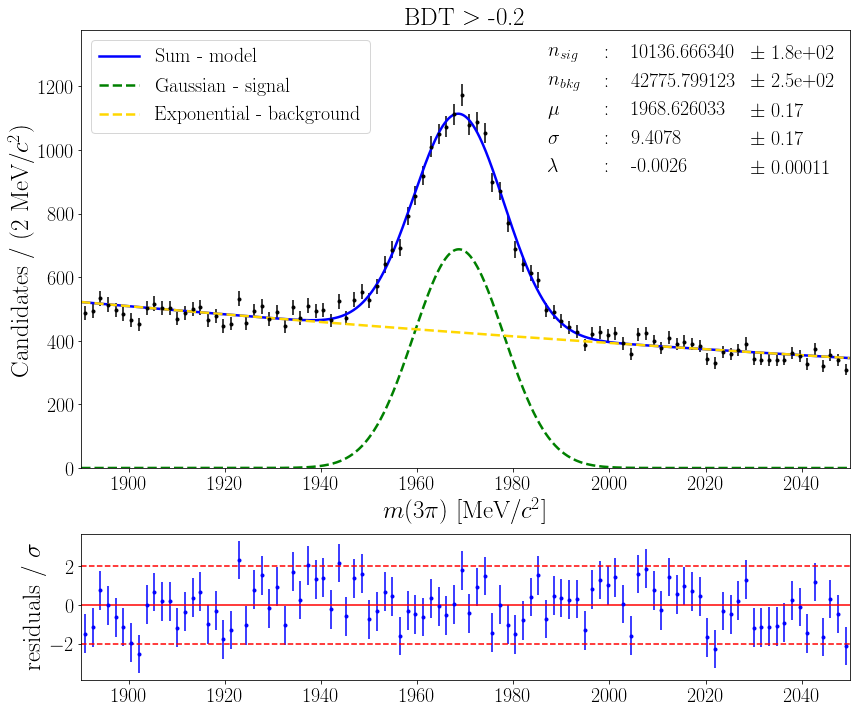

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/data strip/tau_M_data_strip_fit_BDT-0.2.pdf


In [13]:
plot_hist_fit_particle(df_data_strip_cut,'tau_M',models = [model_ga,gaussian_ext_ga,exp_ext_ga], 
              obs=obs_tau_M, n_bins = 100,mode_hist = False, name_data = 'data strip', cut_BDT=-0.2,
              params=params_g, name_params=name_params_ga)

In [14]:
save_params(params_g,'tau_M_B_BDT_sup_-0.2')

parameters saved in /afs/cern.ch/user/c/correian/bd2dst3pi/output/json/tau_M_B_BDT_sup_-0.2_params.json


In [15]:
print(params_g[n_sig_ga]['value'],'+',params_g[n_bkg_ga]['value'],'=',
      params_g[n_sig_ga]['value']+params_g[n_bkg_ga]['value'])
print('Total number of events =',n_events_tau_M)

10136.66633993287 + 42775.799123279685 = 52912.46546321255
Total number of events = 52915


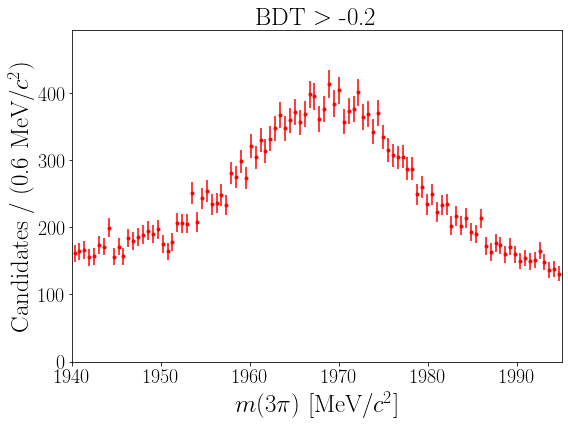

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/data_strip/tau_M_data_strip_BDT-0.2.pdf


In [16]:
# fct.plot_hist({'data_strip_BDTsup-0.2':df_data_strip_cut},'tau_M', 'tau\_M [BDT $>$ -0.2]', 'MeV/$c^2$', 
#               low = 1940, high = 1995,
#               n_bins = 100, mode_hist = False, 
#               name_folder = 'data_strip_BDT')
fct.plot_hist_particle({'data_strip':df_data_strip_cut},'tau_M', 
              low = 1940, high = 1995, cut_BDT=-0.2,
              n_bins = 100, mode_hist = False)

## Fit on B0_M for  1950 < tau_M < 1995

24867


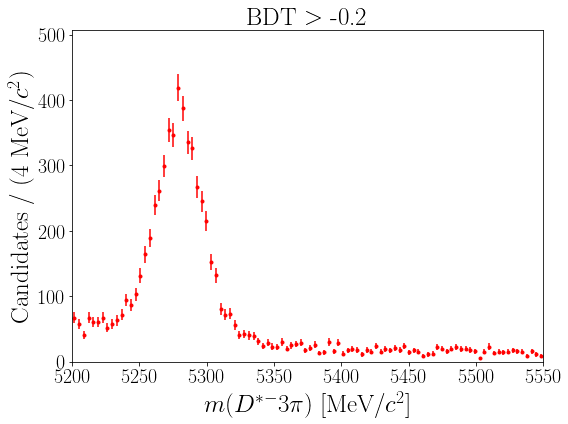

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/data_strip/B0_M_data_strip_BDT-0.2.pdf


In [34]:
low_B0Ds = 5200.
high_B0Ds = 5550.
low_Ds = 1940.
high_Ds = 1995.

df_B0Ds = df_data_strip_cut.query(f"tau_M < {high_Ds} and tau_M >{low_Ds}")
n_events_B0Ds = len(df_B0Ds)
print(n_events_B0Ds)
fct.plot_hist_particle({'data_strip':df_B0Ds}, 
              'B0_M', n_bins = 100, mode_hist = False,
              low=low_B0Ds, high=high_B0Ds,cut_BDT=-0.2)

In [6]:
mu_B0Ds    = zfit.Parameter("mu_B0Ds", 5280., 5260., 5290.)
sigma_B0Ds = zfit.Parameter("sigma_B0Ds", 10., 1., 40.)
lambd_B0Ds = zfit.Parameter("lambda_B0Ds", -0.0008, -0.01, -0.0001)
n_bkg_B0Ds = zfit.Parameter('n_bkg_B0Ds', n_events_B0Ds*2/3,0,n_events_B0Ds) # IC from the fit without the Ds gaussian
n_sig_B0Ds = zfit.Parameter('n_sig_B0Ds', n_events_B0Ds*1/3,0,n_events_B0Ds)

In [7]:
name_params_B0Ds ={
    'mu_B0Ds':'$\mu$',
    'sigma_B0Ds':'$\sigma$',
    'n_bkg_B0Ds':'$n_{bkg}$',
    'n_sig_B0Ds':'$n_{sig}$',
    'lambda_B0Ds':'$\\lambda$',
}

In [8]:
obs_B0Ds = zfit.Space("x", limits=(low_B0Ds, high_B0Ds))

gaussian_B0Ds = zfit.pdf.Gauss(mu_B0Ds, sigma_B0Ds, obs=obs_B0Ds)
exponential_B0Ds = zfit.pdf.Exponential(lambd_B0Ds, obs=obs_B0Ds)

# sum of the two PDFs
gaussian_ext_B0Ds = gaussian_B0Ds.create_extended(n_sig_B0Ds)
exp_ext_B0Ds = exponential_B0Ds.create_extended(n_bkg_B0Ds)
model_B0Ds = zfit.pdf.SumPDF([gaussian_ext_B0Ds, exp_ext_B0Ds]) # gauss is folded by frac

In [9]:
data_B0Ds = zfit.Data.from_pandas(df_B0Ds['B0_M'],obs=obs_B0Ds)
result_B0Ds, params_B0Ds = launch_fit(model_B0Ds, data_B0Ds, extended=True)

------------------------------------------------------------------
| FCN = -1.846e+04              |     Ncalls=433 (433 total)     |
| EDM = 7.22e-05 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
name             value    minuit_hesse         minuit_minos    at limit
-----------  ---------  --------------  -------------------  ----------
n_sig_B0Ds        4108     +/-      82  -     82   +

Info: DavidonErrorUpdator: delgam < 0 : first derivatives increasing along search line
Info: VariableMetricBuilder: matrix not pos.def, gdel > 0
Info: gdel = 38684.6
Info in negative or zero diagonal element in covariance matrix : i = 1
Info in added to diagonal of Error matrix a value : dg = 0.502424
Info: gdel = -1.36118e+07
Info: VariableMetricBuilder: no improvement in line search
Info: VariableMetricBuilder: iterations finish without convergence.
Info in VariableMetricBuilder : edm = 26871.8
Info in             requested : edmval = 0.001
Info in negative or zero diagonal element in covariance matrix : i = 3
Info in added to diagonal of Error matrix a value : dg = 2331.82
Info in matrix forced pos-def by adding to diagonal : padd = 72.5311
Info: MnHesse: matrix was forced pos. def. 
Info: VariableMetricBuilder: Tolerance is not sufficient, continue the minimization
Info in Current  Edm is : edm = 2.83049e+07
Info in Required Edm is : edmval = 0.001


/afs/cern.ch/user/c/correian/bd2dst3pi/scripts/fit.py:339: UserWarning: The function <function Space.limits at 0x7facee4a53b0> may does not return the actual area/limits but rather the rectangular limits. <zfit Space obs=('x',), axes=None, limits=(array([[5200.]]), array([[5550.]]))> can also have functional limits that are arbitrarily defined and lay inside the rect_limits. To test if a value is inside, use `inside` or `filter`.
  low = float(obs.limits[0])
/afs/cern.ch/user/c/correian/bd2dst3pi/scripts/fit.py:32: UserWarning: The function <function Space.area at 0x7facee4aa7a0> may does not return the actual area/limits but rather the rectangular limits. <zfit Space obs=('x',), axes=None, limits=(array([[5200.]]), array([[5550.]]))> can also have functional limits that are arbitrarily defined and lay inside the rect_limits. To test if a value is inside, use `inside` or `filter`.
  return counts.sum() * obs.area() / n_bins
findfont: Font family ['serif'] not found. Falling back to Dej

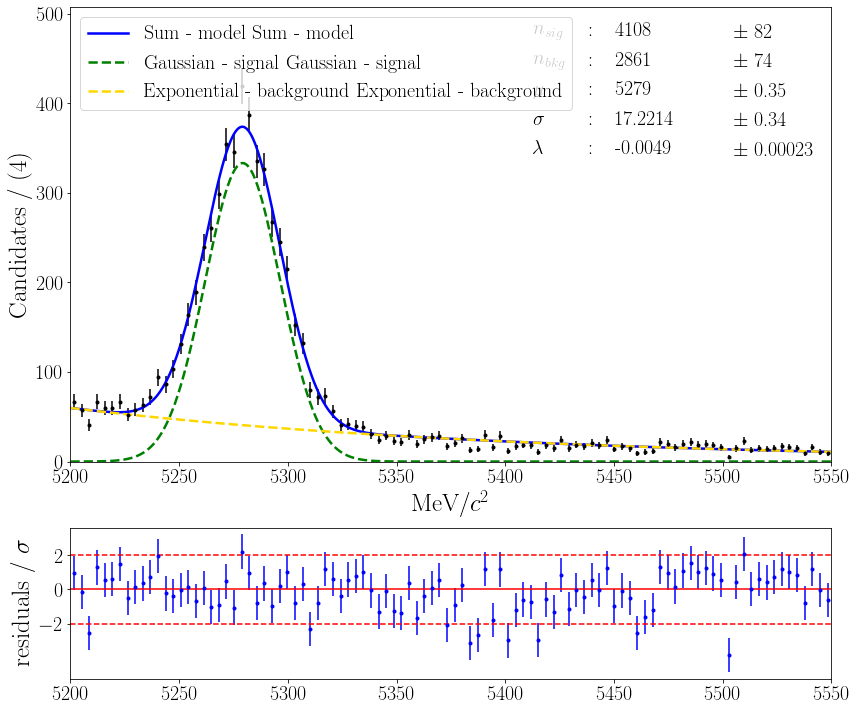

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/data_strip_cutDeltaM/B0_M_data_strip_BDT_sup_-0.2_B0Ds_fit.pdf


In [10]:
plot_hist_fit(df_B0Ds,'B0_M','MeV/$c^2$',models = [model_B0Ds,gaussian_ext_B0Ds,exp_ext_B0Ds], 
              obs=obs_B0Ds, n_bins = 100,mode_hist = False, name_models = ['Sum - model', 'Gaussian - signal',
                                                                      'Exponential - background'],
              name_folder = 'data_strip_cutDeltaM', name_data = 'data\_strip\_BDT\_sup\_-0.2\_B0Ds',
              params=params_B0Ds, name_params=name_params_B0Ds)

In [11]:
save_params(params_B0Ds,'B0_M_B0Ds_BDT_sup_-0.2')

UnboundLocalError: local variable 'error_param' referenced before assignment

## Fitting B0_M with BDT > -0.2
- One exponential component
- One CB (Crystall ball PDF)
- A gaussian component to account for partially reconstructed decays such as $B^0 \to D^* \pi \pi \pi \pi^0$
- A gaussien component to account for $B^0 \to D^* Ds$, whose yield was computed before.

In [7]:
with open(f'{loc.JSON}/tau_M_B_BDT_sup_-0.2_params.json', 'r') as f:
    tau_M_B_BDT_sup_m0p5_params = json.load(f)
n_Ds = tau_M_B_BDT_sup_m0p5_params['n_sig_ga|-0.2']
print(n_Ds)

10136.66633993287


In [8]:
# with open(f'{loc.JSON}/B0_M_B0Ds_BDT_sup_-0.2_params.json', 'r') as f:
#     B0_M_B0Ds_BDT_sup_m0p5_params = json.load(f)
    
# mu_B0Ds_v = B0_M_B0Ds_BDT_sup_m0p5_params['mu_B0Ds'] 
# sigma_B0Ds_v = B0_M_B0Ds_BDT_sup_m0p5_params['sigma_B0Ds'] 

# print('mu_B0Ds', mu_B0Ds_v)
# print('sigma_B0Ds', sigma_B0Ds_v)

In [9]:
MC_param_results['mu_MC']

5281.17718503673

In [10]:
low = 5050.
high = 5550.
obs = zfit.Space("x", limits=(low, high))

In [11]:
mu = zfit.Parameter("mu", MC_param_results['mu_MC'], MC_param_results['mu_MC']-3., MC_param_results['mu_MC']+3.)
#mu = zfit.Parameter("mu", 5280, 5280.-3., 5280.+3.)

#sigma = zfit.Parameter("sigma", 20., 10., 30.)
# sigma       17.87     +/-   0.074  -  0.079   +  0.074       False
#sigma = zfit.Parameter("sigma", MC_param_results['sigma_MC'], 10., 25.)
#sigma = zfit.Parameter("sigma", MC_param_results['sigma_MC'], 13., 25.)
#sigma = zfit.Parameter("sigma", 17, 17.-5., 17.+5.)
sigma = zfit.Parameter("sigma", 17, 17.-2., 17.+2.)

alphaL = zfit.Parameter("alphaL", MC_param_results['alphaL_MC'], 0.01, 10., floating=True)
nL = zfit.Parameter("nL", MC_param_results['nL_MC'], 0.1, 5., floating=True)

alphaR = zfit.Parameter("alphaR", MC_param_results['alphaR_MC'], 0.01, 10., floating=False)
nR = zfit.Parameter("nR", MC_param_results['nR_MC'], 0.1, 5., floating=False)


In [12]:
n_events_B0_M = len(df_data_strip_cut.query(f'B0_M > {low} and B0_M < {high}'))
#n_bkg = zfit.Parameter('n_bkg', 149200,0,n_events_B0_M) # IC from the fit without the Ds gaussian
#n_sig = zfit.Parameter('n_sig', 351600,0,n_events_B0_M)
#n_bkg = zfit.Parameter('n_bkg', 138000, 0, n_events_B0_M) # IC from a previous fit
#n_sig = zfit.Parameter('n_sig', 238000, 0, n_events_B0_M)

# n_bkg = zfit.Parameter('n_bkg', 238000, 238000*0.2, n_events_B0_M) # IC from a previous fit
# n_sig = zfit.Parameter('n_sig', 138000, 138000*0.2, n_events_B0_M*2/3)

n_bkg = zfit.Parameter('n_bkg', 104000, 104000*0.2, n_events_B0_M) # IC from a previous fit
n_sig = zfit.Parameter('n_sig', 126000, 126000*0.2, n_events_B0_M*2/3)

In [13]:
print(n_events_B0_M/2)

138925.5


In [14]:
#lambd = zfit.Parameter("lambda", -0.002, -1, -0.0001)
#lambd = zfit.Parameter("lambda", -0.0009, -0.01, -0.0001)
#lambd = zfit.Parameter("lambda", -0.0008, -0.01, -0.0001)
#lambd = zfit.Parameter("lambda", -0.0008, -0.01, -0.0001)
#lambd = zfit.Parameter("lambda", -0.0008, -0.01, -0.00008)
#lambd = zfit.Parameter("lambda", -0.001, -0.01, -0.00008)
#lambd = zfit.Parameter("lambda", -0.001, -0.008, -0.00008)
lambd = zfit.Parameter("lambda", -0.001, -0.004, -0.00008)

In [15]:
#mu2 = zfit.Parameter("mu2", 5050, 5000, 5150)
#mu2 = zfit.Parameter("mu2", 5050, 5000, 5100)
#mu2 = zfit.Parameter("mu2", 5060, 5045, 5075)
#mu2 = zfit.Parameter("mu2", 5060., 5040., 5080.)
mu2 = zfit.Parameter("mu2", 5055., 5040., 5070.)

#sigma2 = zfit.Parameter("sigma2", 50., 5., 70.)
#sigma2 = zfit.Parameter("sigma2", 55., 5., 100.)
# sigma2         61.92     +/-     1.6  -      3   +    2.3       False 8
#sigma2 = zfit.Parameter("sigma2", 55., 5., 70.)
#sigma2      63.33     +/-     1.7  -    2.7   +    2.8       False
#sigma2 = zfit.Parameter("sigma2", 60, 45., 70.)
#sigma2 = zfit.Parameter("sigma2", 64., 45., 70.)

#sigma2 = zfit.Parameter("sigma2", 64., 59., 70.)
#sigma2 = zfit.Parameter("sigma2", 64., 59., 69.)
sigma2 = zfit.Parameter("sigma2", 64., 59.,69.)


In [16]:
#n_bkg2 = zfit.Parameter('n_bkg2', 42000,0,n_events_B0_M/8) # IC from the previous fit
#n_bkg2 = zfit.Parameter('n_bkg2', 35000,0,n_events_B0_M/8) # IC from the fit without the Ds gaussian
#n_bkg2         42070     +/- 1.1e+03  -1.1e+03   +1.1e+03       False 3
#n_bkg2 = zfit.Parameter('n_bkg2', 42000,42000,n_events_B0_M/6)
#n_bkg2 = zfit.Parameter('n_bkg2', 42000,0,n_events_B0_M/4)
#n_bkg2 = zfit.Parameter('n_bkg2', 42000,10000,n_events_B0_M/4)
#n_bkg2 = zfit.Parameter('n_bkg2', 38000,10000,n_events_B0_M/4)
#n_bkg2      37310     +/- 1.1e+03  -1.1e+03   +1.1e+03       False
n_bkg2 = zfit.Parameter('n_bkg2', 37300,10000,n_events_B0_M/4)

In [17]:
#mu_Ds = zfit.Parameter("mu_Ds", 5280, 5260., 5300.)
#mu_Ds           5281     +/-    0.43  -   0.43   +   0.43       False
#mu_Ds = zfit.Parameter("mu_Ds", 5280, 5270., 5280.)
#variable at limit --> get back to almost before
#mu_Ds = zfit.Parameter("mu_Ds", mu_B0Ds_v, mu_B0Ds_v-10., mu_B0Ds_v+10.,floating=True)
#sigma_Ds = zfit.Parameter("sigma_Ds", sigma_B0Ds_v, sigma_B0Ds_v-15., sigma_B0Ds_v+15., floating=True)
#sigma_Ds = zfit.Parameter("sigma_Ds", 10., 5., 60.)
# sigma_Ds       8.989     +/-    0.31  -   0.31   +   0.34       False
#sigma_Ds = zfit.Parameter("sigma_Ds", 9., 1., 30.)
# new: sigma_Ds          30     +/-  0.0015  -   0.24   +   0.23        True
#sigma_Ds = zfit.Parameter("sigma_Ds", 9., 1., 40.)
#sigma_Ds          40     +/-  0.0015  -      1   +      1        True
#sigma_Ds = zfit.Parameter("sigma_Ds", 9., 5., 50.)


In [18]:
n_bkg_Ds = zfit.Parameter('n_bkg_Ds', n_Ds, floating=False)

In [5]:
print(n_Ds)

NameError: name 'n_Ds' is not defined

In [21]:
name_params ={
    'mu'      : '$\mu$',
    'sigma'   : '$\sigma$',
    'alphaL'  : '$\\alpha_L$',
    'alphaR'  : '$\\alpha_R$',
    'nL'      : '$n_L$',
    'nR'      : '$n_R$',
    'n_bkg'   : '$n_{bkg}$',
    'n_sig'   : '$n_{sig}$',
    'lambda'  : '$\\lambda$',
    'mu2'     : '$\\mu_2$',
    'sigma2'  : '$\\sigma_2$',
    'n_bkg2'  : '$n_{bkg2}$',
    "n_bkg_Ds": '$n_{bkg,D^*D_s}$',
}

In [22]:
doubleCB = zfit.pdf.DoubleCB(mu, sigma, alphaL, alphaR, nL, nR, obs=obs)
exponential = zfit.pdf.Exponential(lambd, obs=obs)
gaussian = zfit.pdf.Gauss(mu2,sigma2,obs=obs)
#gaussian_Ds = zfit.pdf.Gauss(mu_Ds,sigma_Ds,obs=obs)
doubleCB_Ds = zfit.pdf.DoubleCB(mu, sigma, alphaL, alphaR, nL, nR, obs=obs)

# sum of the two PDFs
doubleCB_ext = doubleCB.create_extended(n_sig)
exp_ext = exponential.create_extended(n_bkg)
gaussian_ext = gaussian.create_extended(n_bkg2)
#gaussian_Ds_ext = gaussian_Ds.create_extended(n_bkg_Ds)
doubleCB_Ds_ext = doubleCB_Ds.create_extended(n_bkg_Ds)

model = zfit.pdf.SumPDF([doubleCB_ext, exp_ext,gaussian_ext,doubleCB_Ds_ext]) # gauss is folded by frac

In [23]:
data = zfit.Data.from_pandas(df_data_strip_cut['B0_M'],obs=obs)
result, params = launch_fit(model, data, extended=True)

------------------------------------------------------------------
| FCN = -1.601e+06              |     Ncalls=543 (543 total)     |
| EDM = 0.000336 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
name         value    minuit_hesse         minuit_minos    at limit
------  ----------  --------------  -------------------  ----------
n_sig       129400     +/- 7.2e+02  -8.1e+02   +7.2e+02     

/afs/cern.ch/user/c/correian/bd2dst3pi/scripts/fit.py:339: UserWarning: The function <function Space.limits at 0x7faf2cc16440> may does not return the actual area/limits but rather the rectangular limits. <zfit Space obs=('x',), axes=None, limits=(array([[5050.]]), array([[5550.]]))> can also have functional limits that are arbitrarily defined and lay inside the rect_limits. To test if a value is inside, use `inside` or `filter`.
  low = float(obs.limits[0])
/afs/cern.ch/user/c/correian/bd2dst3pi/scripts/fit.py:32: UserWarning: The function <function Space.area at 0x7faf2cc1b830> may does not return the actual area/limits but rather the rectangular limits. <zfit Space obs=('x',), axes=None, limits=(array([[5050.]]), array([[5550.]]))> can also have functional limits that are arbitrarily defined and lay inside the rect_limits. To test if a value is inside, use `inside` or `filter`.
  return counts.sum() * obs.area() / n_bins


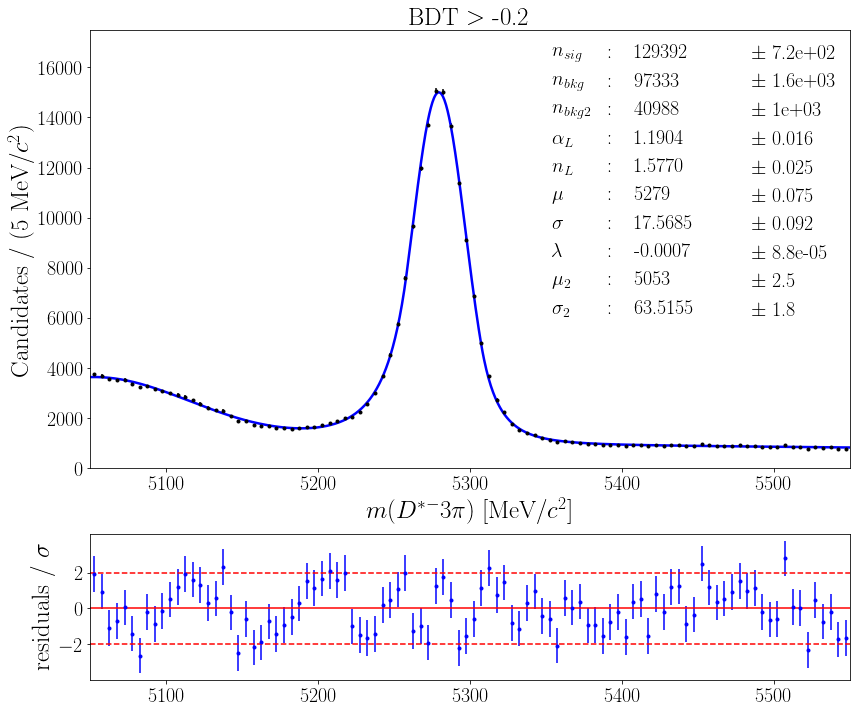

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/data_strip_cutDeltaM/B0_M_data_strip_cutDeltaM_fit_BDT-0.2.pdf


In [24]:
# plot_hist_fit(df_data_strip_cut,'B0_M','$MeV/c^2$',models = model, obs=obs, n_bins = 100,mode_hist = False,
#               name_folder = 'data_strip_cutDeltaM',name_data = 'data\_strip\_BDT\_sup\_-0.2',
#               params=params,name_params=name_params)
plot_hist_fit_particle(df_data_strip_cut,'B0_M', models = model, obs=obs, n_bins = 100,mode_hist = False,
              name_data = 'data strip cutDeltaM', cut_BDT=-0.2,
              params=params,name_params=name_params)

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


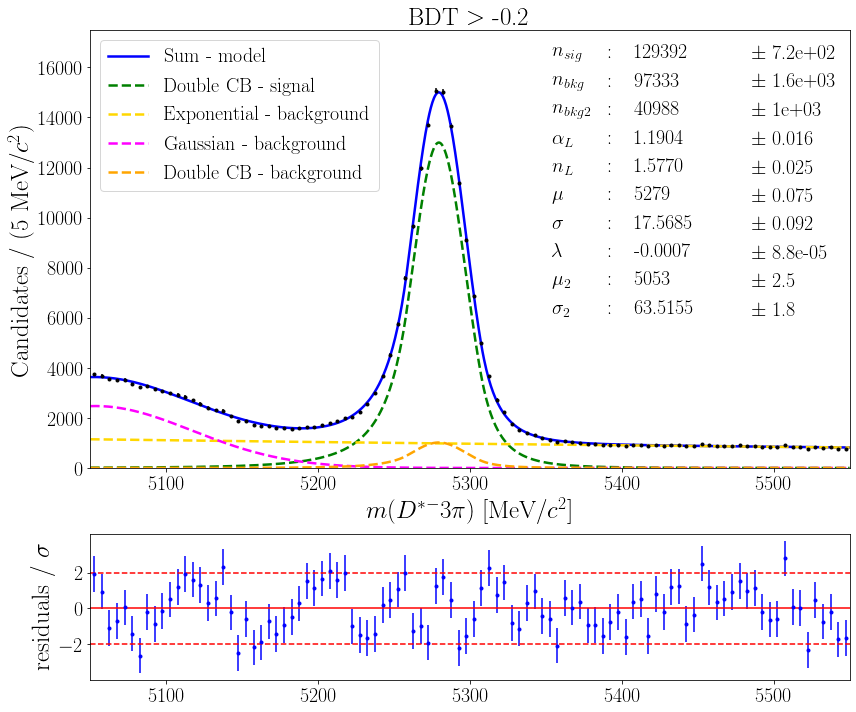

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/data_strip_cutDeltaM/B0_M_data_strip_cutDeltaM_fit_BDT-0.2.pdf


In [25]:
plot_hist_fit_particle(df_data_strip_cut,'B0_M', models = [model,doubleCB_ext,exp_ext,gaussian_ext, doubleCB_Ds_ext], 
              obs=obs, n_bins = 100,mode_hist = False,
              name_data = 'data strip cutDeltaM',cut_BDT=-0.2,
              params=params,name_params=name_params)

In [ ]:
save_params(params,'B0_M_BDT_sup_-0.2',True)

In [ ]:
exp_ext.name

In [ ]:
f"{params[n_sig]['value']:.4f}"

In [19]:
print(n_bkg_Ds)

<zfit.Parameter 'n_bkg_Ds' floating=False value=1.014e+04>
